## Assignment 3.2: Using Data to Improve MLB Attendance

In [1]:
# First I will import some needed libraries
import pandas as pd
from importlib import reload
import sys
import numpy as np
from imp import reload
import nltk
import matplotlib.pyplot as plt 
import matplotlib.gridspec as gridspec 
%matplotlib inline
import seaborn as sns 

## Importing the Data

In [24]:
# I will use pandas to pull the data to create a data frame to work from
dodgers_data = pd.read_csv('dodgers-2022.csv')
dodgers_data

,month,day,attend,day_of_week,opponent,temp,skies,day_night,cap,shirt,fireworks,bobblehead
0,APR,10,56000,Tuesday,Pirates,67,Clear,Day,NO,NO,NO,NO
1,APR,11,29729,Wednesday,Pirates,58,Cloudy,Night,NO,NO,NO,NO
2,APR,12,28328,Thursday,Pirates,57,Cloudy,Night,NO,NO,NO,NO
3,APR,13,31601,Friday,Padres,54,Cloudy,Night,NO,NO,YES,NO
4,APR,14,46549,Saturday,Padres,57,Cloudy,Night,NO,NO,NO,NO
...,...,...,...,...,...,...,...,...,...,...,...,...
76,SEP,29,40724,Saturday,Rockies,84,Cloudy,Night,NO,NO,NO,NO
77,SEP,30,35607,Sunday,Rockies,95,Clear,Day,NO,NO,NO,NO
78,OCT,1,33624,Monday,Giants,86,Clear,Night,NO,NO,NO,NO
79,OCT,2,42473,Tuesday,Giants,83,Clear,Night,NO,NO,NO,NO


In [25]:
# First I will view the data type
dodgers_data.dtypes

month          object
day             int64
attend          int64
day_of_week    object
opponent       object
temp            int64
skies          object
day_night      object
cap            object
shirt          object
fireworks      object
bobblehead     object
dtype: object

As seen above we can see that the month variable is a object as it is listed as the actual month and not in a numeric form. While the only integers we have in this data set is for the day, attendance, and temperature.

In [26]:
dodgers_data.describe()

,day,attend,temp
count,81.000000,81.000000,81.000000
mean,16.135802,41040.074074,73.148148
std,9.605666,8297.539460,8.317318
min,1.000000,24312.000000,54.000000
25%,8.000000,34493.000000,67.000000
50%,15.000000,40284.000000,73.000000
75%,25.000000,46588.000000,79.000000
max,31.000000,56000.000000,95.000000


Above we can see that the mean temperature at a game was 73.14 degrees which is not bad at all. While the mean number of attendies is 41,040 which is also a decent amount of people to show up to a game. 

In [27]:
dodgers_data

,month,day,attend,day_of_week,opponent,temp,skies,day_night,cap,shirt,fireworks,bobblehead
0,APR,10,56000,Tuesday,Pirates,67,Clear,Day,NO,NO,NO,NO
1,APR,11,29729,Wednesday,Pirates,58,Cloudy,Night,NO,NO,NO,NO
2,APR,12,28328,Thursday,Pirates,57,Cloudy,Night,NO,NO,NO,NO
3,APR,13,31601,Friday,Padres,54,Cloudy,Night,NO,NO,YES,NO
4,APR,14,46549,Saturday,Padres,57,Cloudy,Night,NO,NO,NO,NO
...,...,...,...,...,...,...,...,...,...,...,...,...
76,SEP,29,40724,Saturday,Rockies,84,Cloudy,Night,NO,NO,NO,NO
77,SEP,30,35607,Sunday,Rockies,95,Clear,Day,NO,NO,NO,NO
78,OCT,1,33624,Monday,Giants,86,Clear,Night,NO,NO,NO,NO
79,OCT,2,42473,Tuesday,Giants,83,Clear,Night,NO,NO,NO,NO


In [28]:
dodgers_data = dodgers_data.replace({'cap': {'YES': 1,'NO': 0}})
dodgers_data = dodgers_data.replace({'shirt': {'YES': 1,'NO': 0}})
dodgers_data = dodgers_data.replace({'fireworks': {'YES': 1,'NO': 0}})
dodgers_data = dodgers_data.replace({'bobblehead': {'YES': 1,'NO': 0}})

In [29]:
# next I will view the data type again to see 
# what has been updated to int64
dodgers_data.dtypes

month          object
day             int64
attend          int64
day_of_week    object
opponent       object
temp            int64
skies          object
day_night      object
cap             int64
shirt           int64
fireworks       int64
bobblehead      int64
dtype: object

In [55]:
dodgers_data

,month,day,attend,day_of_week,opponent,temp,skies,day_night,cap,shirt,fireworks,bobblehead
0,APR,10,56000,Tuesday,Pirates,67,Clear,Day,0,0,0,0
1,APR,11,29729,Wednesday,Pirates,58,Cloudy,Night,0,0,0,0
2,APR,12,28328,Thursday,Pirates,57,Cloudy,Night,0,0,0,0
3,APR,13,31601,Friday,Padres,54,Cloudy,Night,0,0,1,0
4,APR,14,46549,Saturday,Padres,57,Cloudy,Night,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
76,SEP,29,40724,Saturday,Rockies,84,Cloudy,Night,0,0,0,0
77,SEP,30,35607,Sunday,Rockies,95,Clear,Day,0,0,0,0
78,OCT,1,33624,Monday,Giants,86,Clear,Night,0,0,0,0
79,OCT,2,42473,Tuesday,Giants,83,Clear,Night,0,0,0,0


Above we can see that the variables cap, shirt, fireworks, and bobblehead have been converted to integers. 

## Correlation Between Variables 

In [38]:
# Next I will view the correlation for several of my variables
dodgers_data.corr()["fireworks"]

day           0.099528
attend        0.002094
temp         -0.189899
cap          -0.072732
shirt        -0.089648
fireworks     1.000000
bobblehead   -0.181207
Name: fireworks, dtype: float64

In [39]:
dodgers_data.corr()["bobblehead"]

day           0.145363
attend        0.581895
temp          0.049573
cap          -0.063074
shirt        -0.077743
fireworks    -0.181207
bobblehead    1.000000
Name: bobblehead, dtype: float64

In [40]:
dodgers_data.corr()["shirt"]

day          -0.030182
attend        0.133269
temp          0.004394
cap          -0.031204
shirt         1.000000
fireworks    -0.089648
bobblehead   -0.077743
Name: shirt, dtype: float64

In [41]:
dodgers_data.corr()["cap"]

day          -0.202274
attend       -0.055002
temp          0.064521
cap           1.000000
shirt        -0.031204
fireworks    -0.072732
bobblehead   -0.063074
Name: cap, dtype: float64

In [44]:
matrix = dodgers_data.corr()
matrix

,day,attend,temp,cap,shirt,fireworks,bobblehead
day,1.000000,0.027093,-0.127612,-0.202274,-0.030182,0.099528,0.145363
attend,0.027093,1.000000,0.098951,-0.055002,0.133269,0.002094,0.581895
temp,-0.127612,0.098951,1.000000,0.064521,0.004394,-0.189899,0.049573
cap,-0.202274,-0.055002,0.064521,1.000000,-0.031204,-0.072732,-0.063074
shirt,-0.030182,0.133269,0.004394,-0.031204,1.000000,-0.089648,-0.077743
fireworks,0.099528,0.002094,-0.189899,-0.072732,-0.089648,1.000000,-0.181207
bobblehead,0.145363,0.581895,0.049573,-0.063074,-0.077743,-0.181207,1.000000


The above correlations tell us that the teams sees the highest correlation between attendance and bobblehead giveaways coming in at 58.18% compaired to a free shirt with a correlation of only 13.32%.

## Visualizations

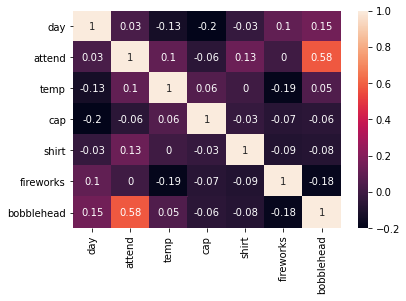

In [45]:
# Next I will create a visualizing for a Correlation Matrix through the use of Seaborn
matrix = dodgers_data.corr().round(2)
sns.heatmap(matrix, annot=True)
plt.show()

The heat map shows us that the highest correlation we have in regards to attendance is the free bobbleheads. So some advice we can see from this is that fans are more likely to come to a game if they are going to et a free bobblehead compaired to a shirt and are even less likely for some reason to come if they are giving out free hats. As I myself have been to some games and remembered going and receiving a free bobblehead sometimes and made sure I went to games that gave them out. As this is a cool free gift for fans to take back home if they didnt get the chance to catch a foul ball, home run ball, or pick something up at the shop.

Text(0.5, 0, 'Month')

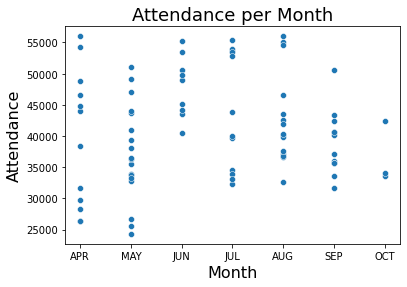

In [58]:
sns.scatterplot('month','attend',data=dodgers_data)
plt.title('Attendance per Month', fontsize=18)
plt.ylabel('Attendance', fontsize=16)
plt.xlabel('Month', fontsize=16)

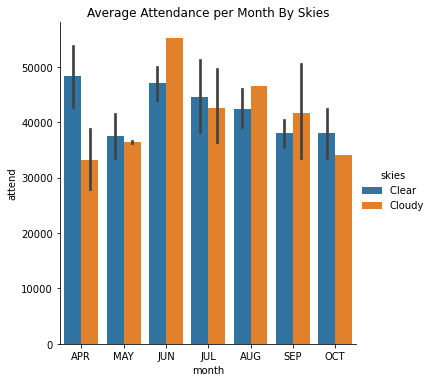

In [60]:
sns.catplot(data = dodgers_data, x = 'month', y = 'attend', hue = 'skies', kind = "bar").set(title='Average Attendance per Month By Skies')

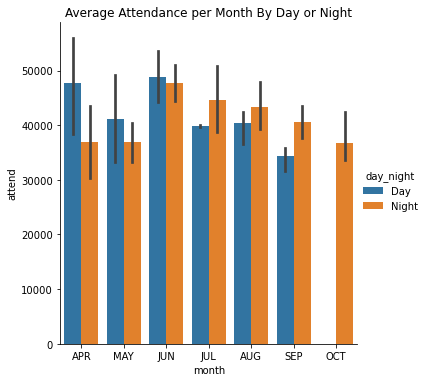

In [61]:
sns.catplot(data = dodgers_data, x = 'month', y = 'attend', hue = 'day_night', kind = "bar").set(title='Average Attendance per Month By Day or Night')

/Users/Robyn/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 0, 'Temperature')

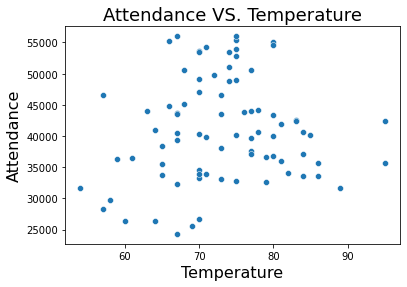

In [51]:
sns.scatterplot('temp','attend',data=dodgers_data)
plt.title('Attendance VS. Temperature', fontsize=18)
plt.ylabel('Attendance', fontsize=16)
plt.xlabel('Temperature', fontsize=16)

As seen above the from our two scatterplots we see that as temeratures raise above 80 and go lower than 70 degrees we see a drop in attendance. While in regards to months we see that June, July, and August have the highest turnout for each game in these months compaired to May September, and October we see fewer in attendance due to fewer games in later months. While we also see that for April, May, and June we have a higher attendance for day games while we see higher turnouts for july, august, and september for night games and only night games in october. While on another note games during April, May, July, and October had higher turnouts for clear skies.

## Create dummy variables

In [62]:
# I will be creating dummy variables for my skies variable to see the dummy values for both clear and cloudy skies
sky = pd.get_dummies(dodgers_data['skies'])
dodgers_data = pd.concat([dodgers_data,sky],axis=1)
dodgers_data.head()

,month,day,attend,day_of_week,opponent,temp,skies,day_night,cap,shirt,fireworks,bobblehead,Clear,Cloudy
0,APR,10,56000,Tuesday,Pirates,67,Clear,Day,0,0,0,0,1,0
1,APR,11,29729,Wednesday,Pirates,58,Cloudy,Night,0,0,0,0,0,1
2,APR,12,28328,Thursday,Pirates,57,Cloudy,Night,0,0,0,0,0,1
3,APR,13,31601,Friday,Padres,54,Cloudy,Night,0,0,1,0,0,1
4,APR,14,46549,Saturday,Padres,57,Cloudy,Night,0,0,0,0,0,1


## Calculate Correlation and P-values

In [69]:
from scipy.stats import spearmanr
# I will calculate the spearman rank correlation and the p-value for the skies and attendance variables
rho, p = spearmanr(dodgers_data['attend'], dodgers_data['skies'])
print(rho)
print(p)

-0.14455279697805704
0.1979101223707068


In [70]:
# Next I will calculate the spearman rank correlation and the p-value for the Cloudy sky and attendance variables
rho, p = spearmanr(dodgers_data['attend'], dodgers_data['Cloudy'])
print(rho)
print(p)

-0.14455279697805704
0.1979101223707068


The spearman rank correlation indicates a negative correlation between attendance and skies and even for just the Cloud skies and a P-value above 0.05 that came in at 0.1979 which is determined to be not significant.

In [71]:
# Next I will calculate the spearman rank correlation and the p-value for the day_night variable and attendance variable
rho, p = spearmanr(dodgers_data['attend'], dodgers_data['day_night'])
print(rho)
print(p)

-0.03194415616353275
0.7770993120821882


Which indicates a negative correlation between attendance and skies and even for just the Cloud skies and a P-value above 0.05 that came in at 0.7770 which is determined to be not significant and higher than the skies variable.

In [72]:
# Next I will calculate the spearman rank correlation and the p-value for the bobblehead and attendance variables
rho, p = spearmanr(dodgers_data['attend'], dodgers_data['bobblehead'])
print(rho)
print(p)

0.544860357325685
1.450121757548658e-07


last I wanted to see the spearman rank correlation and the p-value for the bobblehead and attendance variables which showed a positive correlation coming in at 0.5448 and a pvalue of 1.45.  

## Recommendation & Conclusion

As for my recommendation to management to determine how to improve attendance I would like to walk them through several variables that came to my attention when working on improving attendance for the following season. First variable being the temperature as I have determined that as temperatures raise above 80 and go lower than 70 degrees, we see a drop in attendance. Meaning when we know temperatures are getting low maybe have an incentive for fans such as a free cup of hot chocolate or a discount on a souvenir cup. While when temperatures rise give out a free miniature souvenir baseball cap with an ice-cream purchase. While the second highest correlation that was determined from your variables is free t-shirts that had came in at 13.32% meaning you are more likely to gain more fans to the game if they are receiving a free t-shirt. While the number one correlation for a higher attendance was free bobbleheads as this showed a 58.18% correlation meaning you are going to have the most fans in your arena when these are given out. So, what you can do to raise sales when you are giving out bobbleheads is add some other discount in your store or at your snack stand to increase sales being that you already have the fans in the arena you might as well try and gain an extra sale. So overall the main way to gain attendance is to offer more free items as your fans really love the bobbleheads. Try to come up with new cheap free items like a pack of exclusive baseball cards free with entrance and maybe even slip some in that are signed by the players. As this would cost little to none and would be an incentive for fans to come. 